In [199]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf , pacf


In [200]:
sales = pd.read_csv('Sales.csv',names=["month","sales"],header=1).dropna()
sales.head(10)

,month,sales
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0
5,1949-07,148.0
6,1949-08,148.0
7,1949-09,136.0
8,1949-10,119.0
9,1949-11,104.0


In [201]:
sales.describe()

,sales
count,143.000000
mean,281.475524
std,119.550851
min,104.000000
25%,180.500000
50%,267.000000
75%,361.000000
max,622.000000


<Axes: >

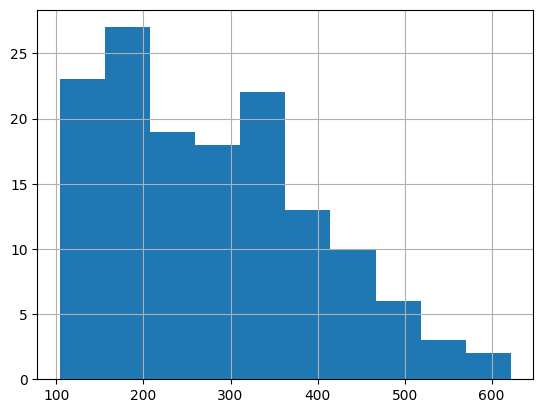

In [202]:
sales["sales"].hist()

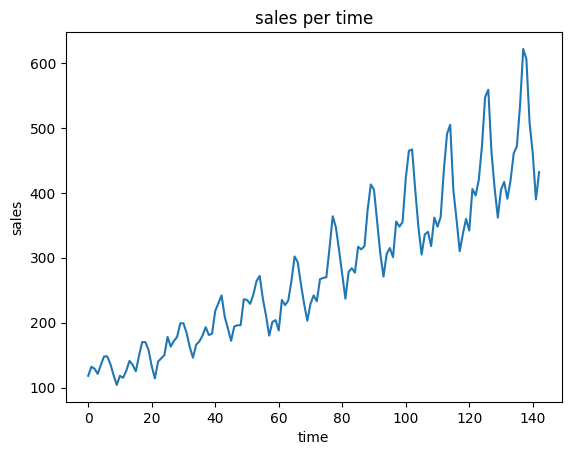

In [203]:
# plt.Figure(figsize=(20,15))
def plot_sales(sales):
    plt.plot(sales)
    plt.title("sales per time")
    plt.xlabel("time")
    plt.ylabel("sales")

plot_sales(sales["sales"])


In [204]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


perform_adf_test(sales["sales"])

ADF Statistic: 0.792340
p-value: 0.991512


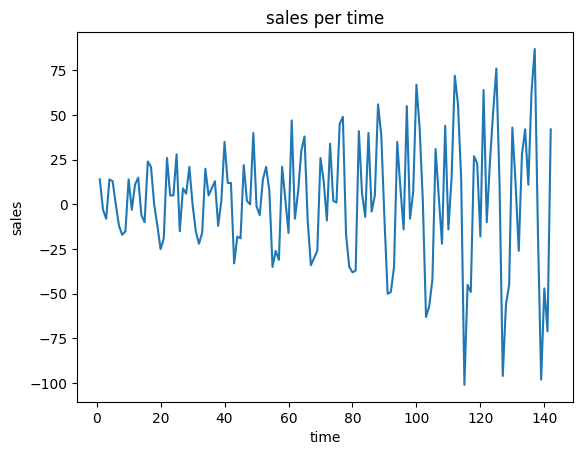

In [205]:
sales["1diff"] = sales["sales"].diff()
plot_sales(sales["1diff"])

[  14.   -3.   -8.   14.   13.    0.  -12.  -17.  -15.   14.   -3.   11.
   15.   -6.  -10.   24.   21.    0.  -12.  -25.  -19.   26.    5.    5.
   28.  -15.    9.    6.   21.    0.  -15.  -22.  -16.   20.    5.    9.
   13.  -12.    2.   35.   12.   12.  -33.  -18.  -19.   22.    2.    0.
   40.   -1.   -6.   14.   21.    8.  -35.  -26.  -31.   21.    3.  -16.
   47.   -8.    7.   30.   38.   -9.  -34.  -30.  -26.   26.   13.   -9.
   34.    2.    1.   45.   49.  -17.  -35.  -38.  -37.   41.    6.   -7.
   40.   -4.    5.   56.   39.   -8.  -50.  -49.  -35.   35.    9.  -14.
   55.   -8.    7.   67.   43.    2.  -63.  -57.  -42.   31.    4.  -22.
   44.  -14.   15.   72.   56.   14. -101.  -45.  -49.   27.   23.  -18.
   64.  -10.   24.   52.   76.   11.  -96.  -56.  -45.   43.   12.  -26.
   28.   42.   11.   63.   87.  -16.  -98.  -47.  -71.   42.]


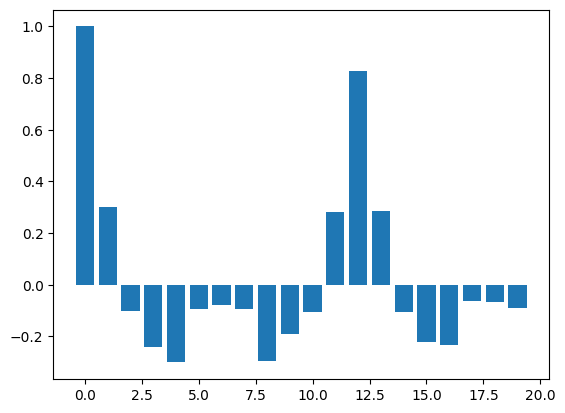

In [206]:
def plot_acf(sales,num_lags = 20):
    print(sales.values)
    acf_vals = acf(sales.values)
    plt.bar(range(num_lags),acf_vals[:num_lags])

first_diff = sales["1diff"].dropna()
plot_acf(first_diff)

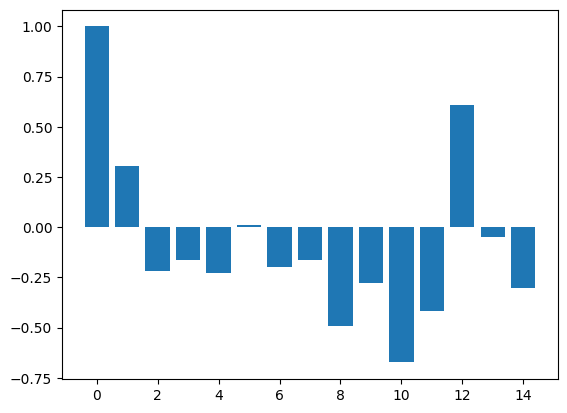

In [207]:
def plotting_pacf(sales):
    pacf_vals = pacf(sales)
    num_lags = 15
    plt.bar(range(num_lags), pacf_vals[:num_lags])

plotting_pacf(first_diff)

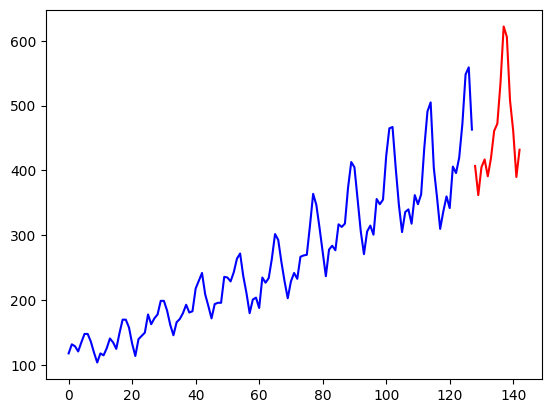

In [208]:
test_size = 0.1


def double_plot(train,test):
    ax = plt.subplot()
    ax.plot(train,color = "blue")
    ax.plot(test , color = "red")

data_size = sales["1diff"].shape[0]
test_end = int(data_size*(1-test_size))

train_data = sales.iloc[:test_end]
test_data = sales.iloc[test_end:]



double_plot(train_data["sales"],test_data["sales"])




In [209]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(train_data["1diff"], order=my_order, seasonal_order=my_seasonal_order)

In [210]:
fitted_model= model.fit()


c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


15

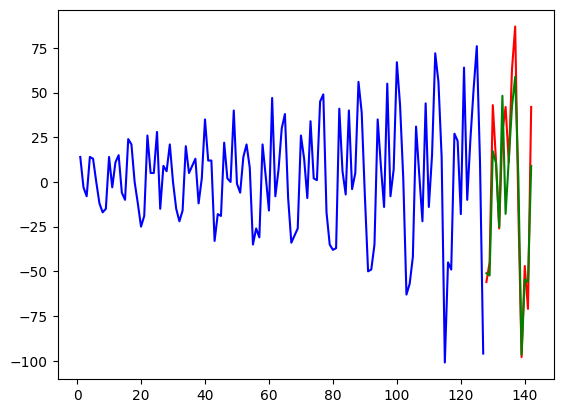

In [214]:
def double_plot(train,test,fitted):
    ax = plt.subplot()
    train = train["1diff"]
    test = test["1diff"]
    ax.plot(train,color = "blue")
    ax.plot(test , color = "red")
    ax.plot(fitted , color = "green")

forecast_steps = 15

fitted_values = fitted_model.forecast(steps=data_size-test_end)

double_plot(train_data,test_data,fitted_values)

len(fitted_values)

In [218]:
print('Mean Absolute Percent Error:', round(np.mean(abs(fitted_values/test_data["sales"])),2))

Mean Absolute Percent Error: 0.08
